# Учебный проект на тему "A/B-тестирование"

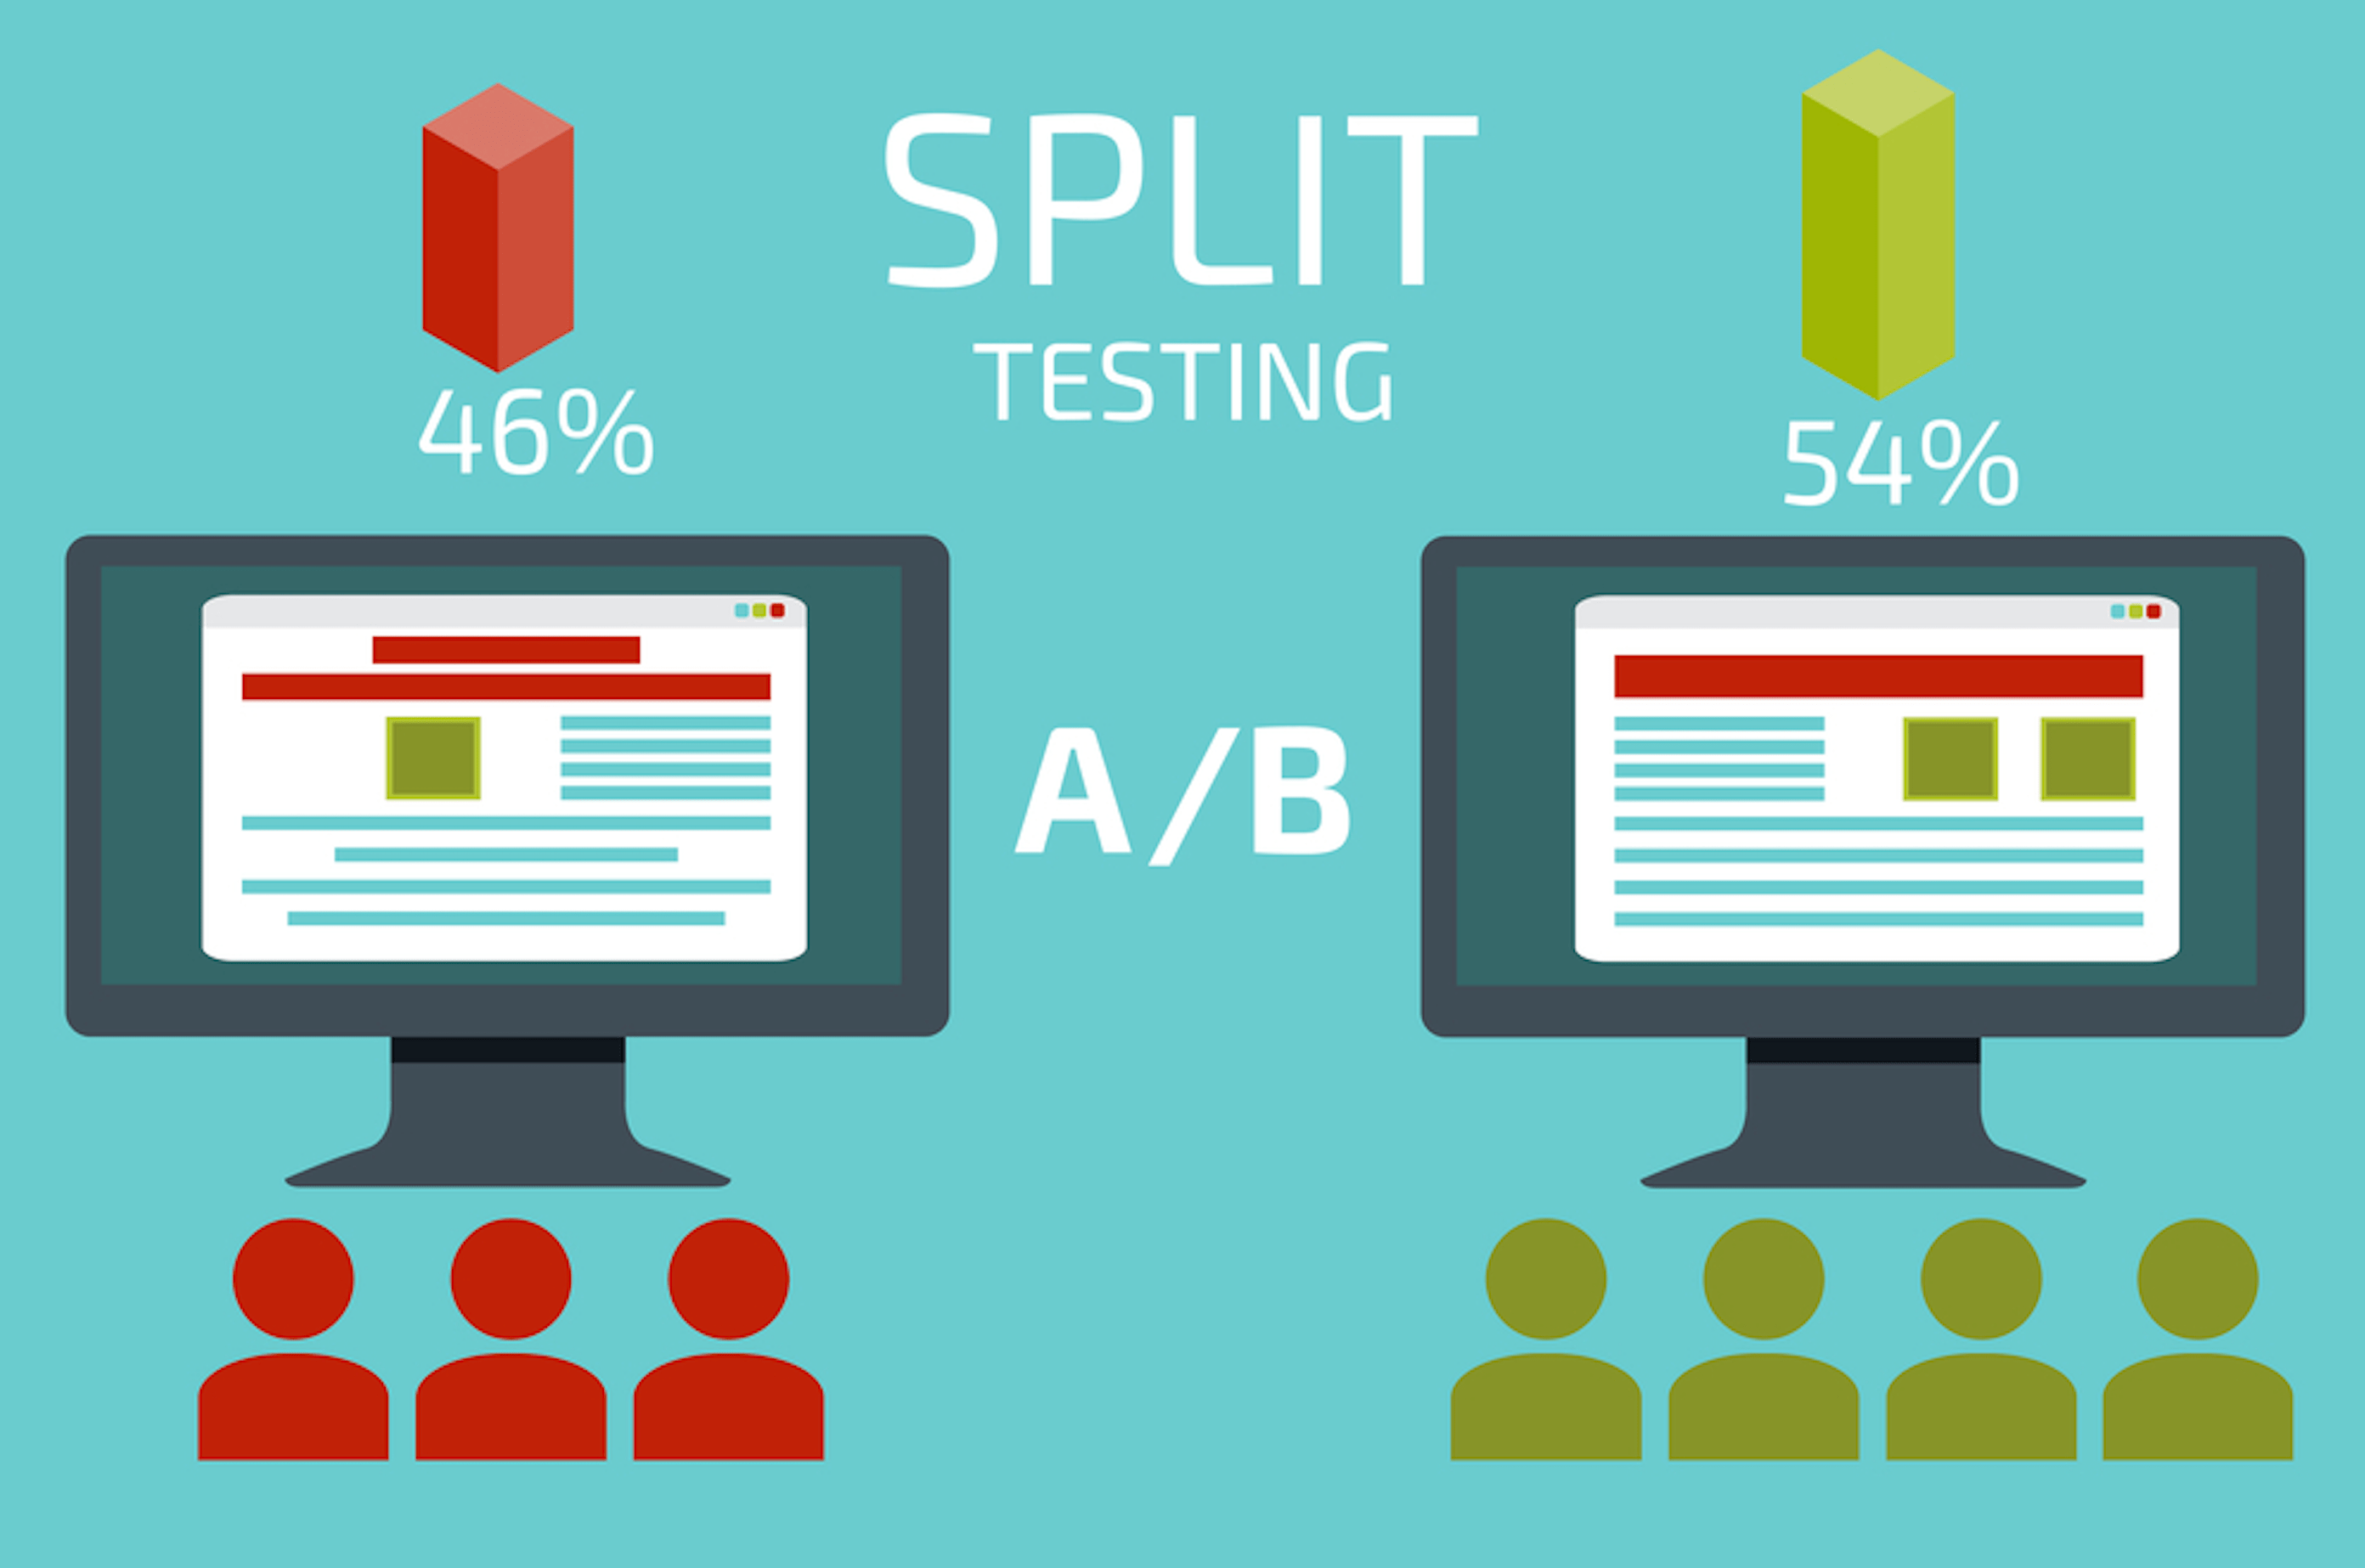

# 1. Введение

**A/B-тестирование** — это рандомизированный эксперимент, в котором проводится анализ двух маркетинговых стратегий, чтобы выбрать лучшую маркетинговую стратегию, которая может эффективно и действенно конвертировать больше трафика в продажи (или больше трафика в желаемую цель). A/B-тестирование — одна из ценных концепций, которую должен знать каждый профессионал в области науки о данных.

# 2. Импорт библиотек

In [20]:
import pandas as pd
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

# 3. Загрузка данных

In [21]:
control_data = pd.read_csv("control_group.csv", sep = ";")
test_data = pd.read_csv("test_group.csv", sep = ";")

In [24]:
control_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
test_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


# 4. Подготовка данных

Наборы данных содержат некоторые ошибки в именах столбцов. Прежде чем двигаться дальше, давайте дадим новые имена столбцам:

In [26]:
control_data.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

test_data.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

In [31]:
control_data.head()

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
test_data.head()

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


Поясним названия столбцов:
* Campaign Name - Название кампании (контрольная или тестовая);
* Date - Дата записи;
* Amount Spent - Сумма, потраченная на кампанию в долларах;
* Number of Impressions - Количество показов, которые реклама прошла в рамках кампании;
* Reach - Количество уникальных показов, полученных в объявлении;
* Website Clicks - Количество кликов по веб-сайту, полученных по объявлениям;
* Searches Received - Количество пользователей, выполнивших поиск на веб-сайте;
* Content Viewed - Количество пользователей, просмотревших контент и товары на веб-сайте;
* Added to Cart - Количество пользователей, добавивших товары в корзину;
* Purchases - Количество покупок.

## 4.1 Проверка значений

Давайте посмотрим, имеют ли наборы данных пустые значения или нет:

In [32]:
control_data.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Searches Received        1
Content Viewed           1
Added to Cart            1
Purchases                1
dtype: int64

In [33]:
test_data.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64

## 4.2 Отсутствующие значения

В наборе данных контрольной кампании отсутствуют значения подряд. Давайте заполним эти недостающие значения средним значением каждого столбца:

In [34]:
control_data["Number of Impressions"].fillna(value=control_data["Number of Impressions"].mean(), 
                                             inplace=True)
control_data["Reach"].fillna(value=control_data["Reach"].mean(), 
                             inplace=True)
control_data["Website Clicks"].fillna(value=control_data["Website Clicks"].mean(), 
                                      inplace=True)
control_data["Searches Received"].fillna(value=control_data["Searches Received"].mean(), 
                                         inplace=True)
control_data["Content Viewed"].fillna(value=control_data["Content Viewed"].mean(), 
                                      inplace=True)
control_data["Added to Cart"].fillna(value=control_data["Added to Cart"].mean(), 
                                     inplace=True)
control_data["Purchases"].fillna(value=control_data["Purchases"].mean(), 
                                 inplace=True)

## 4.3 Объединение наборов данных

Создадим новый набор данных, объединив оба набора данных:

In [35]:
ab_data = control_data.merge(test_data, 
                             how="outer").sort_values(["Date"])
ab_data = ab_data.reset_index(drop=True)
ab_data.head()

C:\Users\max_s\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1207: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(


,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Test Campaign,10.08.2019,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0
3,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
4,Test Campaign,11.08.2019,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0


Прежде чем двигаться дальше, давайте посмотрим, содержит ли набор данных одинаковое количество образцов по обеим кампаниям:

In [39]:
ab_data["Campaign Name"].value_counts()

Control Campaign    30
Test Campaign       30
Name: Campaign Name, dtype: int64

Набор данных содержит 30 образцов для каждой кампании. Теперь давайте начнем с A/B-тестирования, чтобы найти лучшую маркетинговую стратегию.

# 5. A/B-тестирование

Чтобы начать A/B-тестирование, сначала проанализируем взаимосвязь между количеством показов, которые мы получили от обеих кампаний, и суммой, потраченной на обе кампании:

In [47]:
figure = px.scatter(data_frame = ab_data, 
                    x="Number of Impressions",
                    y="Amount Spent", 
                    size="Amount Spent", 
                    color="Campaign Name", 
                    trendline="ols")
figure.show()

## 5.1 Количество запросов

Контрольная кампания привела к большему количеству показов в зависимости от суммы, потраченной на обе кампании. Теперь давайте посмотрим на количество поисковых запросов на сайте из обеих кампаний:

In [63]:
label = ["Количество запросов из контрольной кампании", 
         "Количество запросов из тестовой кампании"]
counts = [sum(control_data["Searches Received"]), 
          sum(test_data["Searches Received"])]
colors = ['red','green']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Контрольная кампания Vs Тестовая кампания: Запросы')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

## 5.2 Клики на веб-сайте

Тестовая кампания привела к увеличению числа поисковых запросов на сайте. Теперь давайте посмотрим на количество кликов на сайт из обеих кампаний:

In [61]:
label = ["Количество веб-кликов из контрольной кампании", 
         "Количество веб-кликов из тестовой кампании"]
counts = [sum(control_data["Website Clicks"]), 
          sum(test_data["Website Clicks"])]
colors = ['red','green']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Контрольная кампания Vs Тестовая кампания: Веб-клики')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

## 5.3 Количество просмотров товаров

Тестовая кампания выигрывает по количеству кликов на сайт. Теперь давайте посмотрим на количество просмотренного контента после перехода на сайт из обеих кампаний:

In [62]:
label = ["Количество просмотров из контрольной кампании", 
         "Количество просмотров из тестовой кампании"]
counts = [sum(control_data["Content Viewed"]), 
          sum(test_data["Content Viewed"])]
colors = ['red','green']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Контрольная кампания Vs Тестовая кампания: Количество просмотров')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

Аудитория контрольной кампании просмотрела больше контента, чем тестовая. Хотя особой разницы нет, поскольку количество кликов на веб-сайте контрольной кампании было низким, его вовлеченность на веб-сайте выше, чем в тестовой кампании.

## 5.4 Товары, добавленные в корзину

Давайте посмотрим на количество товаров, добавленных в корзину из обеих кампаний:

In [66]:
label = ["Количество товаров, добавленных в корзину, из контрольной кампании", 
         "Количество товаров, добавленных в корзину, из тестовой кампании"]
counts = [sum(control_data["Added to Cart"]), 
          sum(test_data["Added to Cart"])]
colors = ['red','green']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Контрольная кампания Vs Тестовая кампания: Товары в корзине')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

Несмотря на низкую посещаемость сайта, в корзину из контрольной кампании было добавлено больше товаров.

## 5.5 Потраченная сумма

Давайте посмотрим на сумму, потраченную на обе кампании:

In [65]:
label = ["Потраченная сумма на контрольную кампанию", 
         "Потраченная сумма на тестовую кампанию"]
counts = [sum(control_data["Amount Spent"]), 
          sum(test_data["Amount Spent"])]
colors = ['red','green']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Контрольная кампания Vs Тестовая кампания: Потраченная сумма')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

Сумма, потраченная на тестовую кампанию, выше, чем на контрольную кампанию. Но, как мы видим, контрольная кампания привела к большему количеству просмотров контента и большему количеству товаров в корзине, контрольная кампания более эффективна, чем тестовая.

## 5.6 Количество покупок

Давайте посмотрим на покупки, сделанные в обеих кампаниях:

In [67]:
label = ["Количество покупок в контрольной кампании", 
         "Количество покупок в тестовой кампании"]
counts = [sum(control_data["Purchases"]), 
          sum(test_data["Purchases"])]
colors = ['red','green']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Контрольная кампания Vs Тестовая кампания: Количество покупок')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

Разница в покупках, совершенных в обеих рекламных кампаниях, составляет всего около 1%. Поскольку контрольная кампания привела к увеличению продаж при меньших затратах на маркетинг, **контрольная кампания здесь выигрывает!**

# 6. Оценка конверсий

Давайте проанализируем некоторые показатели, чтобы определить, какая рекламная кампания приносит больше конверсий. Сначала рассмотрим взаимосвязь между количеством кликов на веб-сайте и просмотренным контентом в обеих кампаниях:

In [57]:
figure = px.scatter(data_frame = ab_data, 
                    x="Content Viewed",
                    y="Website Clicks", 
                    size="Website Clicks", 
                    color= "Campaign Name", 
                    trendline="ols")
figure.show()

Количество кликов по веб-сайту выше в тестовой кампании, но вовлеченность от кликов по веб-сайту выше в контрольной кампании. Итак, **контрольная кампания побеждает!**

Проанализируем взаимосвязь между количеством просмотренного контента и количеством добавленных в корзину товаров из обеих кампаний:

In [58]:
figure = px.scatter(data_frame = ab_data, 
                    x="Added to Cart",
                    y="Content Viewed", 
                    size="Added to Cart", 
                    color= "Campaign Name", 
                    trendline="ols")
figure.show()

**Контрольная кампания выигрывает!!!**

Давайте посмотрим на взаимосвязь между количеством товаров, добавленных в корзину, и количеством покупок по обеим кампаниям:

In [59]:
figure = px.scatter(data_frame = ab_data, 
                    x="Purchases",
                    y="Added to Cart", 
                    size="Purchases", 
                    color= "Campaign Name", 
                    trendline="ols")
figure.show()

Хотя контрольная кампания привела к увеличению продаж и увеличению количества товаров в корзине, уровень разговоров в тестовой кампании выше.

# Выводы

Из приведенных выше A/B-тестов мы обнаружили, что контрольная кампания привела к увеличению продаж и вовлеченности посетителей. В ходе контрольной кампании было просмотрено больше товаров, что привело к увеличению количества товаров в корзине и увеличению продаж. Но в тестовой кампании процент разговоров о товарах в корзине выше. Тестовая кампания привела к увеличению продаж в зависимости от просмотренных и добавленных в корзину продуктов. А контрольная кампания в целом приводит к увеличению продаж. Таким образом, тестовая кампания может использоваться для продвижения определенного продукта определенной аудитории, а контрольная кампания может использоваться для продвижения нескольких продуктов более широкой аудитории.